In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("allUsers.lcl.csv")

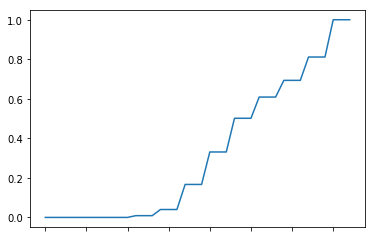

In [9]:
%matplotlib inline
df.apply(lambda col: col.str.contains('?', regex=False).sum()/df.shape[0], axis=0).plot()

In [61]:
#replace ? with 0 and set data types
df = pd.concat([df.iloc[1:,:2].astype(str),
        (df.replace(to_replace='?',value='0',regex=False)
            .iloc[1:,2:]
            .astype(np.float))],
        axis=1)

df_transform = df.groupby(['Class','User']).transform

In [39]:
mean_gesture_coord =  df.groupby('Class').agg(np.mean)
mean_gesture_coord

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
Class,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,37.969235,67.555611,-50.927393,42.275160,65.827956,-52.283226,43.368344,64.419648,-52.326257,41.903785,...,-0.003179,0.109702,0.258408,-0.031470,0.159529,0.225206,-0.081970,0.000000,0.000000,0.000000
2,53.010414,104.135413,-3.678232,51.703808,105.296408,-2.074109,51.066440,104.808564,-1.672063,50.200922,...,-19.500093,52.265101,64.824533,-22.984898,36.859175,48.695558,-20.055456,-0.061465,0.053736,0.003513
3,61.238458,82.474036,-30.489582,60.766998,77.865777,-31.832574,59.189941,67.063050,-37.584390,58.586885,...,-0.052034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,52.957638,93.184199,-30.041936,53.284378,92.419434,-31.007622,54.068081,89.828114,-32.242195,55.262584,...,-4.190135,0.015030,0.045704,-0.022774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,46.838169,83.791616,-32.801635,40.088338,91.867048,-28.264714,35.587407,95.424107,-26.686934,34.706953,...,-24.774603,33.517846,60.676346,-20.380105,15.151370,22.797708,-8.705963,0.000000,0.000000,0.000000


In [66]:
df.query('User==\'2\'').groupby('Class').agg(np.mean)

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
Class,,,,,,,,,,,,,,,,,,,,,
1,42.554587,71.926847,-56.369645,51.831773,68.296997,-59.440151,52.356208,67.355275,-59.252284,51.825285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,80.354816,100.466415,-18.048301,69.033271,106.242792,-11.158758,62.521096,106.396897,-9.926032,59.970635,...,-6.312976,42.316029,82.914412,-9.982649,44.388320,76.324948,-9.678457,0.023138,0.105785,0.010241
3,77.252673,64.469140,-56.637190,71.709267,75.015265,-52.315382,66.038551,73.643415,-48.395129,73.130290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,83.646090,70.133652,-53.390115,77.256757,78.045938,-49.998873,75.526357,79.431819,-48.802541,77.010448,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,49.005770,94.845799,-11.381408,67.535519,89.061785,-17.703995,68.750875,88.136983,-16.306770,66.238038,...,-22.482585,33.071926,45.377496,-8.184656,4.501155,13.620993,2.292541,0.000000,0.000000,0.000000


In [78]:
with pd.option_context('display.max_columns',500):
    display(df.head(15))

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
6,1,0,55.581184,71.641201,-63.703137,34.850565,81.352041,-54.747443,77.078512,42.548245,-72.485489,86.8513316833029,68.0118361327612,-71.9099377306975,61.8568469649144,10.851973378857,-68.8537517321284,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
7,1,0,34.522824,81.457317,-54.900995,55.827687,71.878788,-63.194368,86.902653,68.312680,-71.642074,61.829526515944,11.0149780917446,-68.9587962907051,76.9545074160398,42.7346392143395,-72.500618925002,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
8,1,0,61.621550,10.968187,-69.134037,32.678173,81.172874,-56.994362,86.732368,68.308089,-71.834003,76.8291921744393,42.7382282883737,-72.6301463414381,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
9,1,0,61.401356,11.014961,-69.379418,32.527643,81.127660,-57.092473,86.421066,68.405649,-72.122161,77.1465460607168,42.8279620708044,-72.2614789078606,55.6097082004233,72.0741963345598,-63.1884658182293,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


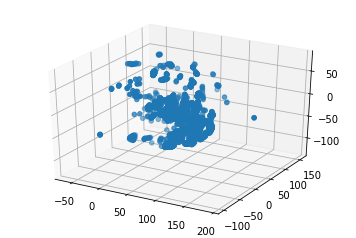

In [67]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
space = plt.figure().gca(projection='3d')
space.scatter(df.query('Class==1')['X0'], df.query('Class==1')['Y0'], df.query('Class==1')['Z0'])

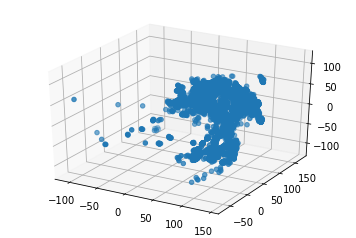

In [71]:
space2 = plt.figure().gca(projection='3d')
space2.scatter(df.query('Class==2')['X0'], df.query('Class==2')['Y0'], df.query('Class==2')['Z0'])

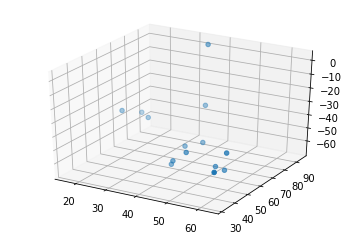

In [76]:
average_hand_position_for_fist = (df.query('Class==1')
                                  .groupby('User')
                                  .agg(np.mean)
                                  .filter(['X0','Y0','Z0']))
average_hand_position_for_fist

space3 = plt.figure().gca(projection='3d')
space3.scatter(average_hand_position_for_fist['X0'],
               average_hand_position_for_fist['Y0'],
               average_hand_position_for_fist['Z0'])
User 1 Mean Fist Position - (30,100,0)
Desired Origin for Fist - (45,100,-30)
Offset for User 1 to get to Desired Origin - (+15,0,-30)

In [31]:
df_lite = df.drop(["stn_code", "agency", "location_monitoring_station"], axis=1)

### Heber's note: From this point we may want to convert dates to just year, or to quarters of year.
### We may want to drop other variables.
### We should fill missing data.
### I will work on some summary plots.


In [85]:
df.dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3        object
Y3        object
Z3        object
X4        object
Y4        object
Z4        object
X5        object
Y5        object
Z5        object
X6        object
Y6        object
Z6        object
X7        object
Y7        object
Z7        object
X8        object
Y8        object
Z8        object
X9        object
Y9        object
Z9        object
X10       object
Y10       object
Z10       object
X11       object
Y11       object
Z11       object
dtype: object